In [6]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

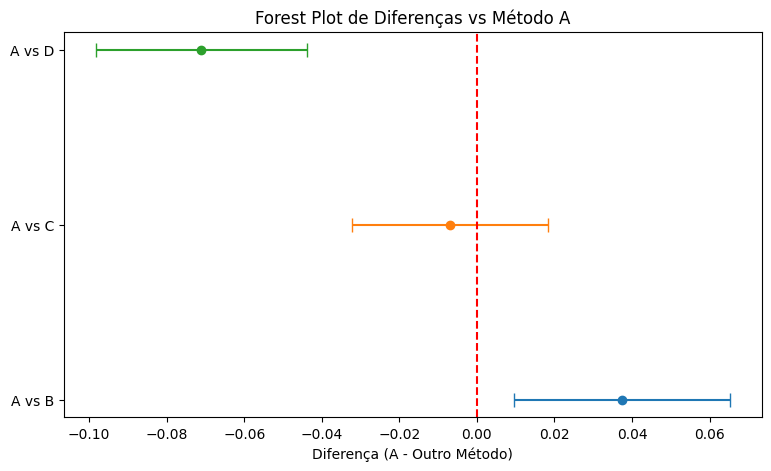

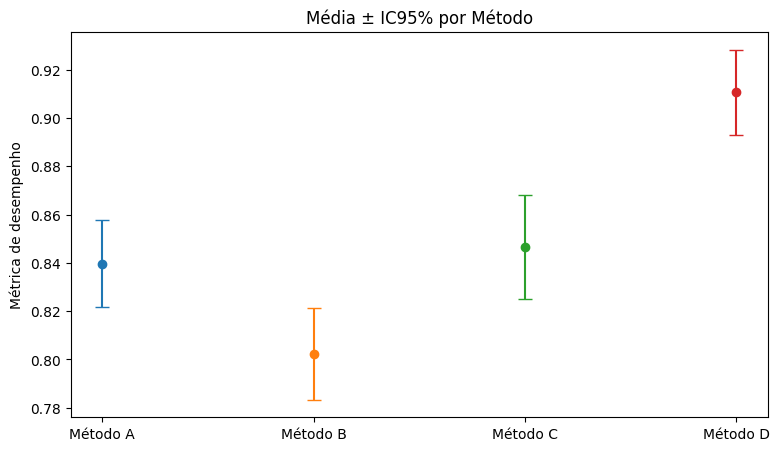

In [7]:
np.random.seed(42)
resultados = {
    "Método A": np.random.normal(loc=0.85, scale=0.1, size=100),
    "Método B": np.random.normal(loc=0.80, scale=0.1, size=100), # pior que A
    "Método C": np.random.normal(loc=0.84, scale=0.1, size=100), # bem parecido com A
    "Método D": np.random.normal(loc=0.90, scale=0.1, size=100), # melhor que A
}


comparacoes = {f"A vs {nome[-1]}": resultados["Método A"] - vals 
               for nome, vals in resultados.items() if nome != "Método A"}

resultados_finais = {}
for nome, diffs in comparacoes.items():
    media = np.mean(diffs)
    intervalo = st.t.interval(confidence=0.95, df=len(diffs)-1, # nível de confiança 95% e depois graus de liberdade
                              loc=media, scale=st.sem(diffs)) # scale é o erro padrão da média (EPM)
    resultados_finais[nome] = {'media': media, 'intervalo': intervalo}

fig, ax = plt.subplots(figsize=(9, 5))
for i, (nome, res) in enumerate(resultados_finais.items()):
    media, (li, ls) = res['media'], res['intervalo']
    # x é onde a bola será plotada, y é a posição vertical, xerr é o erro, capsize é o tamanho das "tampas"
    ax.errorbar(x=media, y=i, xerr=[[media-li],[ls-media]], fmt='o', capsize=5)
ax.axvline(0, color='red', linestyle='--') # linha vermelha tracejada no x=0
ax.set_yticks(range(len(resultados_finais)))
ax.set_yticklabels(resultados_finais.keys())
ax.set_xlabel("Diferença (A - Outro Método)")
ax.set_title("Forest Plot de Diferenças vs Método A")
plt.show()


fig, ax = plt.subplots(figsize=(9, 5))
for i, (nome, vals) in enumerate(resultados.items()):
    media = np.mean(vals)
    intervalo = st.t.interval(confidence=0.95, df=len(vals)-1,
                              loc=media, scale=st.sem(vals))
    ax.errorbar(i, media, 
                yerr=[[media-intervalo[0]],[intervalo[1]-media]], 
                fmt='o', capsize=5, label=nome)
ax.set_xticks(range(len(resultados)))
ax.set_xticklabels(resultados.keys())
ax.set_ylabel("Métrica de desempenho")
ax.set_title("Média ± IC95% por Método")
plt.show()
